<a href="https://colab.research.google.com/github/rbhattar07/Python-Projects--Data-Analysis/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"riddhbhattar","key":"c5e0e992d4ecbb79377bd562ca73891c"}'}

In [3]:
!ls -lha kaggle.json

-rw-r--r-- 1 root root 68 Oct  5 04:55 kaggle.json


In [4]:
!pip install -q kaggle

In [5]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [6]:
!chmod 600 /root/.kaggle/kaggle.json

In [7]:
!pwd

/content


In [8]:
!kaggle datasets list

ref                                                            title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
iamsouravbanerjee/world-population-dataset                     World Population Dataset                             17KB  2022-08-31 11:20:04          13168        377  1.0              
narayan63/netflix-popular-movies-dataset                       Netflix popular movies dataset                        1MB  2022-09-24 08:23:22           1283         33  0.9411765        
anushabellam/trending-videos-on-youtube                        Trending videos on Youtube                           29KB  2022-09-20 12:12:35            979         32  1.0              
whenamancodes/student-performance                              St

In [9]:
!kaggle datasets download -d iamsouravbanerjee/house-rent-prediction-dataset

  0% 0.00/82.4k [00:00<?, ?B/s]
100% 82.4k/82.4k [00:00<00:00, 38.3MB/s]


In [10]:
!unzip house-rent-prediction-dataset.zip

Archive:  house-rent-prediction-dataset.zip
  inflating: Dataset Glossary.txt    
  inflating: House_Rent_Dataset.csv  


In [11]:
!pip install opendatasets 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [12]:
import os
import math
import opendatasets as od
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import joblib

In [13]:
df = pd.read_csv('House_Rent_Dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


## Data Exploration 

In [14]:
df

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2022-05-18,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,2022-05-15,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,2022-07-10,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,2022-07-06,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent


In [15]:
df.describe()

,BHK,Rent,Size,Bathroom
count,4746.000000,4.746000e+03,4746.000000,4746.000000
mean,2.083860,3.499345e+04,967.490729,1.965866
std,0.832256,7.810641e+04,634.202328,0.884532
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


In [16]:
df.dtypes.count()

12

In [17]:
df.columns

Index(['Posted On', 'BHK', 'Rent', 'Size', 'Floor', 'Area Type',
       'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred',
       'Bathroom', 'Point of Contact'],
      dtype='object')

In [18]:
df['BHK'].value_counts()

2    2265
1    1167
3    1098
4     189
5      19
6       8
Name: BHK, dtype: int64

In [19]:
df['Area Type'].value_counts()

Super Area     2446
Carpet Area    2298
Built Area        2
Name: Area Type, dtype: int64

In [20]:
df['Area Locality'].value_counts()

Bandra West                                37
Gachibowli                                 29
Electronic City                            24
Velachery                                  22
Miyapur, NH 9                              22
                                           ..
Kengeri Upanagara                           1
Ittamadu, Banashankari, Outer Ring Road     1
Rmv Extension, Armane Nagar                 1
snv la                                      1
Manikonda, Hyderabad                        1
Name: Area Locality, Length: 2235, dtype: int64

In [21]:
df['City'].value_counts()

Mumbai       972
Chennai      891
Bangalore    886
Hyderabad    868
Delhi        605
Kolkata      524
Name: City, dtype: int64

In [22]:
df['Furnishing Status'].value_counts()

Semi-Furnished    2251
Unfurnished       1815
Furnished          680
Name: Furnishing Status, dtype: int64

In [23]:
df['Bathroom'].value_counts()

2     2291
1     1474
3      749
4      156
5       60
6       12
7        3
10       1
Name: Bathroom, dtype: int64

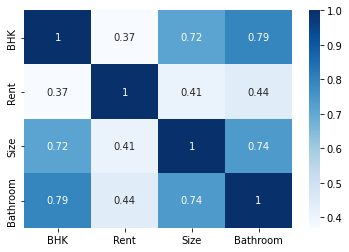

In [24]:
df_corr = df.corr()
df_corr

sns.heatmap(df_corr, annot=True, cmap='Blues');

In [25]:
df.dtypes

Posted On            object
BHK                   int64
Rent                  int64
Size                  int64
Floor                object
Area Type            object
Area Locality        object
City                 object
Furnishing Status    object
Tenant Preferred     object
Bathroom              int64
Point of Contact     object
dtype: object

In [26]:
df.dtypes

Posted On            object
BHK                   int64
Rent                  int64
Size                  int64
Floor                object
Area Type            object
Area Locality        object
City                 object
Furnishing Status    object
Tenant Preferred     object
Bathroom              int64
Point of Contact     object
dtype: object

In [27]:
numeric_cols = df.select_dtypes(include='int64').columns
object_cols = df.select_dtypes(include='object').columns

# Scaling all numeric columns

## Data Cleaning

In [28]:
columns = df.columns
columns

Index(['Posted On', 'BHK', 'Rent', 'Size', 'Floor', 'Area Type',
       'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred',
       'Bathroom', 'Point of Contact'],
      dtype='object')

In [29]:
df['Posted On'] = pd.to_datetime(df['Posted On'])
df['Posted On']

0      2022-05-18
1      2022-05-13
2      2022-05-16
3      2022-07-04
4      2022-05-09
          ...    
4741   2022-05-18
4742   2022-05-15
4743   2022-07-10
4744   2022-07-06
4745   2022-05-04
Name: Posted On, Length: 4746, dtype: datetime64[ns]

In [30]:
df['year'] = pd.DatetimeIndex(df['Posted On']).year
df['month'] = pd.DatetimeIndex(df['Posted On']).month
df['days'] = pd.DatetimeIndex(df['Posted On']).day
df.drop(columns='Posted On', inplace=True)
df

,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,year,month,days
0,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,2022,5,18
1,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,2022,5,13
2,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,2022,5,16
3,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,2022,7,4
4,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner,2022,5,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner,2022,5,18
4742,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner,2022,5,15
4743,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent,2022,7,10
4744,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent,2022,7,6


In [31]:
# Most of the houses are 2 BHKs followed by 1, 3 & 4.
px.histogram(df, x='BHK', title='Distribution of BHK')

In [32]:
px.histogram(df, x='Rent', title='Distribution of Rent')

In [33]:
px.histogram(df, x='Size', title='Distribution of Size')

In [34]:
px.scatter(df, x='Size', y='BHK', color='Rent', title='Size Vs. BHK with Rent')

In [35]:
px.histogram(df, x='month', y='Rent', title='Months vs Rent')

In [36]:
df['Area Type'].unique()

AT_dict = {'Super Area': 1,
           'Carpet Area': 2,
           'Built Area': 3}
df['Area Type'] = df['Area Type'].map(AT_dict)
df

,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,year,month,days
0,2,10000,1100,Ground out of 2,1,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,2022,5,18
1,2,20000,800,1 out of 3,1,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,2022,5,13
2,2,17000,1000,1 out of 3,1,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,2022,5,16
3,2,10000,800,1 out of 2,1,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,2022,7,4
4,2,7500,850,1 out of 2,2,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner,2022,5,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2,15000,1000,3 out of 5,2,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner,2022,5,18
4742,3,29000,2000,1 out of 4,1,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner,2022,5,15
4743,3,35000,1750,3 out of 5,2,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent,2022,7,10
4744,3,45000,1500,23 out of 34,2,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent,2022,7,6


In [37]:
df['City'].unique()

city_dict = {'Kolkata':1,
             'Mumbai':2,
             'Bangalore':3,
             'Delhi':4,
             'Chennai':5,
             'Hyderabad':6}
df['City'] = df['City'].map(city_dict)
df

,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,year,month,days
0,2,10000,1100,Ground out of 2,1,Bandel,1,Unfurnished,Bachelors/Family,2,Contact Owner,2022,5,18
1,2,20000,800,1 out of 3,1,"Phool Bagan, Kankurgachi",1,Semi-Furnished,Bachelors/Family,1,Contact Owner,2022,5,13
2,2,17000,1000,1 out of 3,1,Salt Lake City Sector 2,1,Semi-Furnished,Bachelors/Family,1,Contact Owner,2022,5,16
3,2,10000,800,1 out of 2,1,Dumdum Park,1,Unfurnished,Bachelors/Family,1,Contact Owner,2022,7,4
4,2,7500,850,1 out of 2,2,South Dum Dum,1,Unfurnished,Bachelors,1,Contact Owner,2022,5,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2,15000,1000,3 out of 5,2,Bandam Kommu,6,Semi-Furnished,Bachelors/Family,2,Contact Owner,2022,5,18
4742,3,29000,2000,1 out of 4,1,"Manikonda, Hyderabad",6,Semi-Furnished,Bachelors/Family,3,Contact Owner,2022,5,15
4743,3,35000,1750,3 out of 5,2,"Himayath Nagar, NH 7",6,Semi-Furnished,Bachelors/Family,3,Contact Agent,2022,7,10
4744,3,45000,1500,23 out of 34,2,Gachibowli,6,Semi-Furnished,Family,2,Contact Agent,2022,7,6


In [38]:
df['Furnishing Status'].unique()

fs_dict = {'Unfurnished':1,
           'Semi-Furnished':2,
           'Furnished':3}
df['Furnishing Status'] = df['Furnishing Status'].map(fs_dict)
df

,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,year,month,days
0,2,10000,1100,Ground out of 2,1,Bandel,1,1,Bachelors/Family,2,Contact Owner,2022,5,18
1,2,20000,800,1 out of 3,1,"Phool Bagan, Kankurgachi",1,2,Bachelors/Family,1,Contact Owner,2022,5,13
2,2,17000,1000,1 out of 3,1,Salt Lake City Sector 2,1,2,Bachelors/Family,1,Contact Owner,2022,5,16
3,2,10000,800,1 out of 2,1,Dumdum Park,1,1,Bachelors/Family,1,Contact Owner,2022,7,4
4,2,7500,850,1 out of 2,2,South Dum Dum,1,1,Bachelors,1,Contact Owner,2022,5,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2,15000,1000,3 out of 5,2,Bandam Kommu,6,2,Bachelors/Family,2,Contact Owner,2022,5,18
4742,3,29000,2000,1 out of 4,1,"Manikonda, Hyderabad",6,2,Bachelors/Family,3,Contact Owner,2022,5,15
4743,3,35000,1750,3 out of 5,2,"Himayath Nagar, NH 7",6,2,Bachelors/Family,3,Contact Agent,2022,7,10
4744,3,45000,1500,23 out of 34,2,Gachibowli,6,2,Family,2,Contact Agent,2022,7,6


In [39]:
df['Tenant Preferred'].unique()

tp_dict = {'Bachelors/Family':1,
           'Bachelors':2,
           'Family':3}
df['Tenant Preferred'] = df['Tenant Preferred'].map(tp_dict)
df

,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,year,month,days
0,2,10000,1100,Ground out of 2,1,Bandel,1,1,1,2,Contact Owner,2022,5,18
1,2,20000,800,1 out of 3,1,"Phool Bagan, Kankurgachi",1,2,1,1,Contact Owner,2022,5,13
2,2,17000,1000,1 out of 3,1,Salt Lake City Sector 2,1,2,1,1,Contact Owner,2022,5,16
3,2,10000,800,1 out of 2,1,Dumdum Park,1,1,1,1,Contact Owner,2022,7,4
4,2,7500,850,1 out of 2,2,South Dum Dum,1,1,2,1,Contact Owner,2022,5,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2,15000,1000,3 out of 5,2,Bandam Kommu,6,2,1,2,Contact Owner,2022,5,18
4742,3,29000,2000,1 out of 4,1,"Manikonda, Hyderabad",6,2,1,3,Contact Owner,2022,5,15
4743,3,35000,1750,3 out of 5,2,"Himayath Nagar, NH 7",6,2,1,3,Contact Agent,2022,7,10
4744,3,45000,1500,23 out of 34,2,Gachibowli,6,2,3,2,Contact Agent,2022,7,6


In [40]:
df['Point of Contact'].unique()

poc_dict = {'Contact Owner': 1,
            'Contact Agent': 2,
            'Contact Builder': 3}
df['Point of Contact'] = df['Point of Contact'].map(poc_dict)
df

,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,year,month,days
0,2,10000,1100,Ground out of 2,1,Bandel,1,1,1,2,1,2022,5,18
1,2,20000,800,1 out of 3,1,"Phool Bagan, Kankurgachi",1,2,1,1,1,2022,5,13
2,2,17000,1000,1 out of 3,1,Salt Lake City Sector 2,1,2,1,1,1,2022,5,16
3,2,10000,800,1 out of 2,1,Dumdum Park,1,1,1,1,1,2022,7,4
4,2,7500,850,1 out of 2,2,South Dum Dum,1,1,2,1,1,2022,5,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2,15000,1000,3 out of 5,2,Bandam Kommu,6,2,1,2,1,2022,5,18
4742,3,29000,2000,1 out of 4,1,"Manikonda, Hyderabad",6,2,1,3,1,2022,5,15
4743,3,35000,1750,3 out of 5,2,"Himayath Nagar, NH 7",6,2,1,3,2,2022,7,10
4744,3,45000,1500,23 out of 34,2,Gachibowli,6,2,3,2,2,2022,7,6


In [41]:
print('Floor unique:',df['Floor'].nunique())
print('Area Locality unique:', df['Area Locality'].nunique())

Floor unique: 480
Area Locality unique: 2235


In [42]:
categorical_cols = ['Floor', 'Area Locality']

from sklearn.preprocessing import OneHotEncoder

In [43]:
enc = OneHotEncoder(sparse= False, handle_unknown='ignore').fit(df[categorical_cols])
enc

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [44]:
encoded_cols = list(enc.get_feature_names(categorical_cols)) 
encoded_cols

df[encoded_cols] = enc.transform(df[categorical_cols])
df

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`



,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,...,Area Locality_sra,Area Locality_sri sai arcade madinaguda,Area Locality_sspdl Mayfair,Area Locality_sunanda circal,Area Locality_tollygunge Kabardanga,"Area Locality_vanamali chs ghatla, Ghatla",Area Locality_venkatapuram,Area Locality_venkatesa perumal nagar,Area Locality_villvam towers tnhb colony,Area Locality_whitefield
0,2,10000,1100,Ground out of 2,1,Bandel,1,1,1,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,20000,800,1 out of 3,1,"Phool Bagan, Kankurgachi",1,2,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,17000,1000,1 out of 3,1,Salt Lake City Sector 2,1,2,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2,10000,800,1 out of 2,1,Dumdum Park,1,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2,7500,850,1 out of 2,2,South Dum Dum,1,1,2,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2,15000,1000,3 out of 5,2,Bandam Kommu,6,2,1,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4742,3,29000,2000,1 out of 4,1,"Manikonda, Hyderabad",6,2,1,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4743,3,35000,1750,3 out of 5,2,"Himayath Nagar, NH 7",6,2,1,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4744,3,45000,1500,23 out of 34,2,Gachibowli,6,2,3,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
df.drop(columns=['Floor', 'Area Locality'], inplace=True)

In [46]:
df

,BHK,Rent,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,year,...,Area Locality_sra,Area Locality_sri sai arcade madinaguda,Area Locality_sspdl Mayfair,Area Locality_sunanda circal,Area Locality_tollygunge Kabardanga,"Area Locality_vanamali chs ghatla, Ghatla",Area Locality_venkatapuram,Area Locality_venkatesa perumal nagar,Area Locality_villvam towers tnhb colony,Area Locality_whitefield
0,2,10000,1100,1,1,1,1,2,1,2022,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,20000,800,1,1,2,1,1,1,2022,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,17000,1000,1,1,2,1,1,1,2022,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2,10000,800,1,1,1,1,1,1,2022,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2,7500,850,2,1,1,2,1,1,2022,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2,15000,1000,2,6,2,1,2,1,2022,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4742,3,29000,2000,1,6,2,1,3,1,2022,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4743,3,35000,1750,2,6,2,1,3,2,2022,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4744,3,45000,1500,2,6,2,3,2,2,2022,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Defining inputs and targets

In [47]:
input_cols = df.columns[2:].to_list()
input_cols 


target_cols = df.columns[1]
target_cols


'Rent'

In [48]:
input_cols.append('BHK')
input_cols 

['Size',
 'Area Type',
 'City',
 'Furnishing Status',
 'Tenant Preferred',
 'Bathroom',
 'Point of Contact',
 'year',
 'month',
 'days',
 'Floor_1',
 'Floor_1 out of 1',
 'Floor_1 out of 10',
 'Floor_1 out of 11',
 'Floor_1 out of 12',
 'Floor_1 out of 13',
 'Floor_1 out of 14',
 'Floor_1 out of 15',
 'Floor_1 out of 16',
 'Floor_1 out of 19',
 'Floor_1 out of 2',
 'Floor_1 out of 20',
 'Floor_1 out of 22',
 'Floor_1 out of 24',
 'Floor_1 out of 3',
 'Floor_1 out of 35',
 'Floor_1 out of 4',
 'Floor_1 out of 5',
 'Floor_1 out of 6',
 'Floor_1 out of 7',
 'Floor_1 out of 8',
 'Floor_1 out of 9',
 'Floor_10 out of 10',
 'Floor_10 out of 11',
 'Floor_10 out of 12',
 'Floor_10 out of 13',
 'Floor_10 out of 14',
 'Floor_10 out of 15',
 'Floor_10 out of 16',
 'Floor_10 out of 18',
 'Floor_10 out of 19',
 'Floor_10 out of 20',
 'Floor_10 out of 22',
 'Floor_10 out of 23',
 'Floor_10 out of 24',
 'Floor_10 out of 25',
 'Floor_10 out of 28',
 'Floor_10 out of 31',
 'Floor_10 out of 32',
 'Floor

In [49]:
inputs = df[input_cols]
targets = df[target_cols]

## Training a Machine Learning Model

In [50]:
inputs

,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,year,month,days,...,Area Locality_sri sai arcade madinaguda,Area Locality_sspdl Mayfair,Area Locality_sunanda circal,Area Locality_tollygunge Kabardanga,"Area Locality_vanamali chs ghatla, Ghatla",Area Locality_venkatapuram,Area Locality_venkatesa perumal nagar,Area Locality_villvam towers tnhb colony,Area Locality_whitefield,BHK
0,1100,1,1,1,1,2,1,2022,5,18,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
1,800,1,1,2,1,1,1,2022,5,13,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
2,1000,1,1,2,1,1,1,2022,5,16,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,800,1,1,1,1,1,1,2022,7,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,850,2,1,1,2,1,1,2022,5,9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4741,1000,2,6,2,1,2,1,2022,5,18,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4742,2000,1,6,2,1,3,1,2022,5,15,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
4743,1750,2,6,2,1,3,2,2022,7,10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
4744,1500,2,6,2,3,2,2,2022,7,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3


In [51]:
targets

0       10000
1       20000
2       17000
3       10000
4        7500
        ...  
4741    15000
4742    29000
4743    35000
4744    45000
4745    15000
Name: Rent, Length: 4746, dtype: int64

#### Linear Regression ML

In [52]:
from sklearn.linear_model import LinearRegression

In [53]:
model = LinearRegression()
model.fit(inputs, targets)
predictions = model.predict(inputs)

In [54]:
predictions

array([20672., 19984., 15224., ..., 40120., 45016., 12944.])

In [55]:
def rmse(targets, predictions):
  return np.sqrt(np.mean(np.square(targets-predictions)))

rmse(targets, predictions)

46542.94121185091

#### Ridge Regression

In [56]:
from sklearn.linear_model import Ridge

In [71]:
reg = Ridge(alpha= .7).fit(inputs, targets)
predictions = reg.predict(inputs)
predictions

array([27606.83763491, 20585.68835031,  6079.14707458, ...,
       45007.45739028, 44255.3862851 , 13067.64921073])

In [72]:
rmse(targets, predictions)

48591.85760163635

#### Lasso

In [74]:
from sklearn.linear_model import Lasso

In [87]:
las = Lasso(normalize=True, alpha = 0.4, max_iter=500, random_state=42).fit(inputs, targets)
predictions = las.predict(inputs)
predictions
rmse(targets, predictions)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning:

'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 



46583.43335643159

In [88]:
df

,BHK,Rent,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,year,...,Area Locality_sra,Area Locality_sri sai arcade madinaguda,Area Locality_sspdl Mayfair,Area Locality_sunanda circal,Area Locality_tollygunge Kabardanga,"Area Locality_vanamali chs ghatla, Ghatla",Area Locality_venkatapuram,Area Locality_venkatesa perumal nagar,Area Locality_villvam towers tnhb colony,Area Locality_whitefield
0,2,10000,1100,1,1,1,1,2,1,2022,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,20000,800,1,1,2,1,1,1,2022,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,17000,1000,1,1,2,1,1,1,2022,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2,10000,800,1,1,1,1,1,1,2022,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2,7500,850,2,1,1,2,1,1,2022,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2,15000,1000,2,6,2,1,2,1,2022,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4742,3,29000,2000,1,6,2,1,3,1,2022,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4743,3,35000,1750,2,6,2,1,3,2,2022,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4744,3,45000,1500,2,6,2,3,2,2,2022,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
